<a href="https://colab.research.google.com/github/surbhikumari8431/Hotel-Booking/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Require library to predict the from the data from datset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Findint the path fro file directorey

In [48]:
pwd


'/content'

File path setting and displaying the first 5 data from the dataset

In [49]:
df = pd.read_csv('/content/drive/MyDrive/almabetter capstone project/Hotel Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Number of rows and columns

In [50]:
df.shape

(119390, 32)

Colum Names

In [51]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [52]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

Column Data Types

List item
List item

In [53]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Missing Values

In [54]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Numerical Data

Indented block

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Categorical Data

In [56]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


Data Cleaning

In [57]:
df["children"] = df["children"].fillna(0)
df["country"] = df["country"].fillna("Undefined")
df["agent"] = df["agent"].fillna(0)
df["company"] = df["company"].fillna(0)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


There are no null values. Now look for unique values in each columns.

In [58]:
print ('Hotel                :', df.hotel.unique())
print ('\nYear                 :', df.arrival_date_year.unique())
print ('\nMonth                :',df.arrival_date_month.unique())
print ('\nMeal                 :', df.meal.unique())
print ('\nCountry              :', df.country.unique())
print ('\nMarket Segment       :', df.market_segment.unique())
print ('\nDistribution Channel :', df.distribution_channel.unique())
print ('\nReserved Room Type   :', df.reserved_room_type.unique())
print ('\nAssigned Room Type   :', df.assigned_room_type.unique())
print ('\nDeposit Type         :', df.deposit_type.unique())
print ('\nCustomer Type        :', df.customer_type.unique())
print ('\nReservation Status   :', df.reservation_status.unique())

Hotel                : ['Resort Hotel' 'City Hotel']

Year                 : [2015 2016 2017]

Month                : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Meal                 : ['BB' 'FB' 'HB' 'SC' 'Undefined']

Country              : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Undefined' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 

Replacing 1's and 0's with "YES" AND " NO" in Columns [is_canceled & is_repeated_guest]

In [59]:
df["is_canceled"] = df["is_canceled"].replace({1:"Yes", 0:"No"})
df["is_repeated_guest"] = df["is_repeated_guest"].replace({1:"Yes", 0:"No"})
print(df.is_canceled.unique())
print(df.is_repeated_guest.unique())

['No' 'Yes']
['No' 'Yes']


Finding which hotels contains maximum of bookings?

In [60]:
df.hotel.agg(["value_counts"])

,value_counts
City Hotel,79330
Resort Hotel,40060


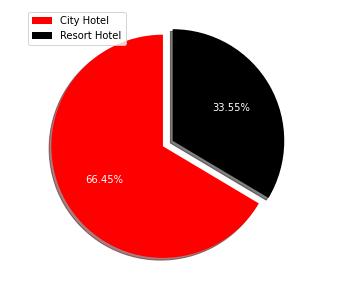

In [61]:
hotel = ["City Hotel", "Resort Hotel"]
booking = df.hotel.value_counts()
color = ["r", "k"]

plt.figure(figsize = (5, 7))
plt.pie(booking, labels = hotel, colors = color, explode = (0, 0.1), textprops = {'color':"w"}, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.legend()

plt.show();

In [62]:
df.groupby(["hotel"])["is_canceled"].agg(["value_counts"])

value_counts
hotel        is_canceled              
City Hotel   No                  46228
             Yes                 33102
Resort Hotel No                  28938
             Yes                 11122

#Bargraph

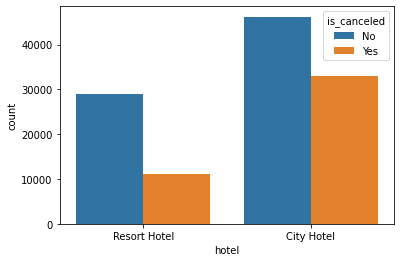

In [63]:
sns.countplot(x = "hotel", hue = "is_canceled", data = df);

Count of previous cancellations per year in each hotel

In [64]:
df.groupby(["hotel", "arrival_date_year"])["previous_cancellations"].agg(["value_counts"])

value_counts
hotel        arrival_date_year previous_cancellations              
City Hotel   2015              0                               9980
                               1                               3684
                               2                                 15
                               11                                 2
                               21                                 1
             2016              0                              36645
                               1                               1338
                               3                                 47
                               2                                 37
                               11                                33
                               13                                12
                               5                                 11
                               4                                 10
                               6                                  7
             2017              0                              27316
                               1                                133
                               2                                 20
                               4                                 15
                               6                                 15
                               5                                  5
                               3                                  4
Resort Hotel 2015              0                               7581
                               1                                577
                               24                                48
                               26                                26
                               25                                25
                               19                                19
                               2                                 16
                               14                                14
                               3                                  8
             2016              0                              18291
                               1                                257
                               2                                 11
                               3                                  4
                               4                                  2
                               5                                  2
             2017              0                              13093
                               1                                 62
                               2                                 17
                               4                                  4
                               3                                  2
                               5                                  1

Count of previous bookings which are not canceled per year in each hotel

In [65]:
df.groupby(["hotel", "arrival_date_year"])["previous_bookings_not_canceled"].agg(["value_counts"])

value_counts
hotel        arrival_date_year previous_bookings_not_canceled              
City Hotel   2015              0                                      13548
                               1                                         65
                               2                                         24
                               3                                         12
                               5                                          7
...                                                                     ...
Resort Hotel 2017              23                                         1
                               26                                         1
                               28                                         1
                               29                                         1
                               30                                         1

[181 rows x 1 columns]

Count of previous cancellations by repeated guests

In [66]:
df[["previous_cancellations"]][df["is_repeated_guest"] == "Yes"].agg(["value_counts"])

,previous_cancellations
,value_counts
0,2883
1,693
2,76
3,52
4,31
11,27
5,19
6,16
13,12


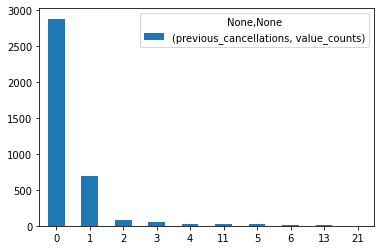

In [67]:
df[["previous_cancellations"]][df["is_repeated_guest"] == "Yes"].agg(["value_counts"]).plot(kind = "bar");
plt.xticks(rotation = 0);

Analysing Preference of guests, what they basically prefer

In [68]:
df["meal"].agg(["value_counts"])

,value_counts
BB,92310
HB,14463
SC,10650
Undefined,1169
FB,798


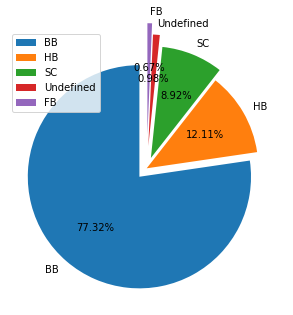

In [69]:
meal = ["BB", "HB", "SC", "Undefined", "FB"]
values = df.meal.value_counts()

plt.figure(figsize = (5, 7))
plt.pie(values, labels = meal, explode = (0.1, 0, 0.1, 0.2, 0.3), autopct = "%.2f%%",startangle = 90)

plt.legend()

plt.show();

The Adults favorite and least favorite meal

In [70]:
df.iloc[np.where((df["adults"] > 0) & (df["meal"] != "Undefined"))]["meal"].agg(["value_counts"])

,value_counts
BB,92020
HB,14454
SC,10546
FB,798


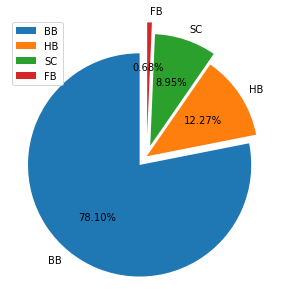

In [71]:
meal = ["BB", "HB", "SC", "FB"]
values = [92020, 14454, 10546, 798]

plt.figure(figsize = (5, 7))
plt.pie(values, labels = meal, explode = (0.1, 0, 0.1, 0.2), autopct = "%.2f%%", startangle = 90)

plt.legend()

The Children favorite and least favorite meals

In [72]:
df.iloc[np.where((df["children"] > 0) & (df["meal"] != "Undefined"))]["meal"].agg(["value_counts"])

,value_counts
BB,7079
HB,1246
SC,156
FB,66


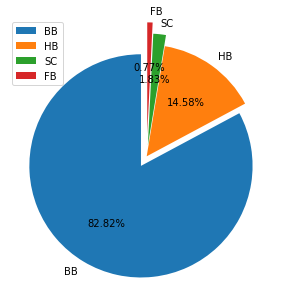

In [73]:
meal = ["BB", "HB", "SC", "FB"]
values = [7079, 1246, 156, 66]

plt.figure(figsize = (5, 7))
plt.pie(values, labels = meal, explode = (0.1, 0, 0.1, 0.2), autopct = "%.2f%%", startangle = 90)

plt.legend()

plt.show();

The Babies favorite and least favorite meals

In [74]:
df.iloc[np.where((df["babies"] > 0) & (df["meal"] != "Undefined"))]["meal"].agg(["value_counts"])

,value_counts
BB,662
HB,178
SC,37
FB,24


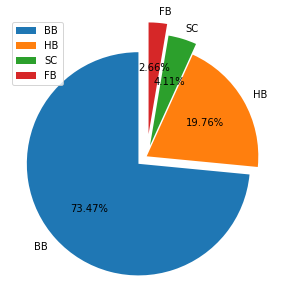

In [75]:
meal = ["BB", "HB", "SC", "FB"]
values = [662, 178, 37, 24]

plt.figure(figsize = (5, 7))
plt.pie(values, labels = meal, explode = (0.1, 0, 0.1, 0.2), autopct = "%.2f%%", startangle = 90)

plt.legend()

plt.show();

The most busy year

In [76]:
df.arrival_date_year.agg(["value_counts"])

,value_counts
2016,56707
2017,40687
2015,21996


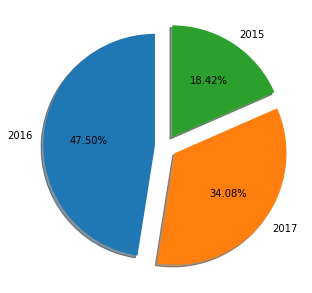

In [77]:
year = [2016, 2017, 2015]
counts = df.arrival_date_year.value_counts()

plt.figure(figsize = (5, 7))
plt.pie(counts, explode = (0.1, 0.1, 0.1), labels = year, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.show();

How many guests arrived year-wise?

In [78]:
df.groupby(["hotel"])["arrival_date_year"].agg(["value_counts"])

value_counts
hotel        arrival_date_year              
City Hotel   2016                      38140
             2017                      27508
             2015                      13682
Resort Hotel 2016                      18567
             2017                      13179
             2015                       8314

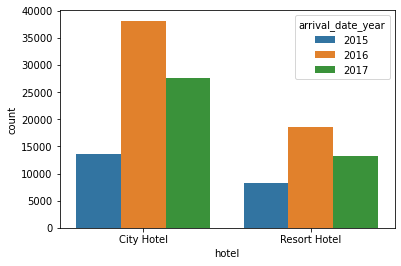

In [79]:
sns.countplot(x = "hotel", hue = "arrival_date_year", data = df, order = ["City Hotel", "Resort Hotel"]);

Which type of customers are more likely to cancel the booking?

In [80]:
df["customer_type"][df["is_canceled"] == "Yes"].agg(["value_counts"])

,value_counts
Transient,36514
Transient-Party,6389
Contract,1262
Group,59


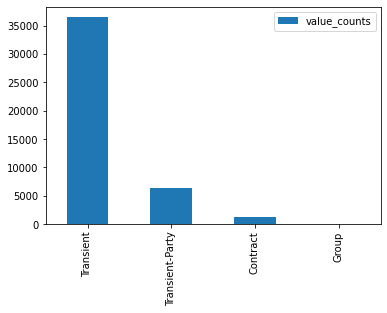

In [81]:
df["customer_type"][df["is_canceled"] == "Yes"].agg(["value_counts"]).plot(kind = "bar");

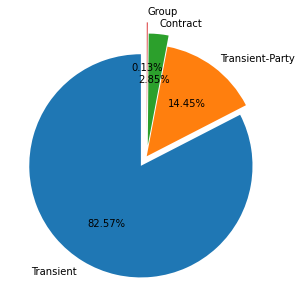

In [82]:
customer = ["Transient", "Transient-Party", "Contract", "Group"]
cancel = [36514, 6389, 1262, 59]

plt.figure(figsize = (5, 7))
plt.pie(cancel, labels = customer, explode = (0.1, 0, 0.1, 0.2), autopct = "%.2f%%", startangle = 90)

plt.show();

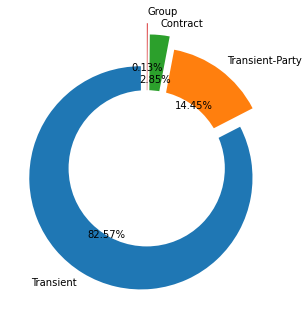

In [83]:
customer = ["Transient", "Transient-Party", "Contract", "Group"]
cancel = [36514, 6389, 1262, 59]

plt.figure(figsize = (5, 7))
plt.pie(cancel, labels = customer, explode = (.1, .1, .2, .3), autopct = "%.2f%%", startangle = 90)

centre_circle = plt.Circle((0, 0), 0.70, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show();

Deposit Type hotel-wise

In [84]:
df.groupby(["hotel"])["deposit_type"].agg(["value_counts"])

value_counts
hotel        deposit_type              
City Hotel   No Deposit           66442
             Non Refund           12868
             Refundable              20
Resort Hotel No Deposit           38199
             Non Refund            1719
             Refundable             142

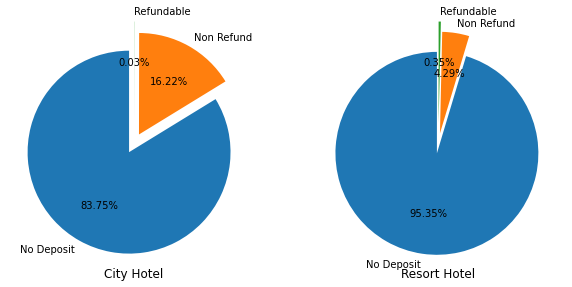

In [85]:
deposit = ["No Deposit", "Non Refund", "Refundable"]
count1 = [66442, 12868, 20]
count2 = [38199, 1719, 142]

plt.figure(figsize = (10, 15))
plt.subplot(1, 2, 1)  
plt.pie(count1, labels = deposit, explode = (0.1, 0.1, 0.2), autopct = "%.2f%%", startangle = 90)
plt.title("City Hotel", y = -0.05)

plt.subplot(1, 2, 2)  
plt.pie(count2, labels = deposit, explode = (0.1, 0.1, 0.2), autopct = "%.2f%%", startangle = 90)
plt.title("Resort Hotel", y = -0.05)

plt.show();

:Number of guests who had not cancelled their booking?

In [86]:
df[df["is_canceled"] =="No"]["country"].agg(["value_counts"])

,value_counts
PRT,21071
GBR,9676
FRA,8481
ESP,6391
DEU,6069
...,...
BHR,1
DJI,1
MLI,1
NPL,1


From where the most guests coming?

In [87]:
df["country"].agg(["value_counts"])

,value_counts
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
DJI,1
BWA,1
HND,1
VGB,1


Maximum number of stays in week nights in each hotel?

In [88]:
df.groupby(["hotel"])["stays_in_week_nights"].agg(["max"])

,max
hotel,
City Hotel,41
Resort Hotel,50


::Maximum number of stays in weekend nights in each hotel?

In [89]:
df.groupby(["hotel"])["stays_in_weekend_nights"].agg(["max"])

,max
hotel,
City Hotel,16
Resort Hotel,19


From where most of the bookings were made?

In [90]:
df.groupby(["hotel"])["market_segment"].agg(["value_counts"])

value_counts
hotel        market_segment              
City Hotel   Online TA              38748
             Offline TA/TO          16747
             Groups                 13975
             Direct                  6093
             Corporate               2986
             Complementary            542
             Aviation                 237
             Undefined                  2
Resort Hotel Online TA              17729
             Offline TA/TO           7472
             Direct                  6513
             Groups                  5836
             Corporate               2309
             Complementary            201

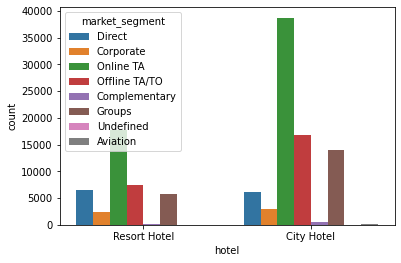

In [91]:
sns.countplot(x = "hotel", hue = "market_segment", data = df);

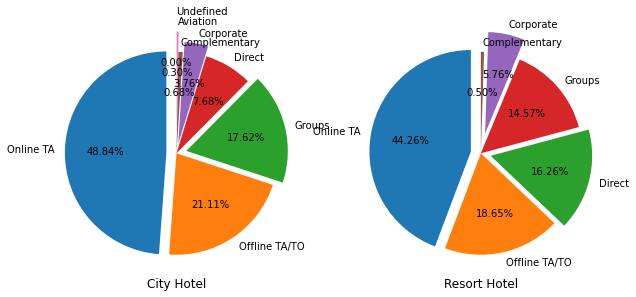

In [92]:
city = ["Online TA", "Offline TA/TO", "Groups", "Direct", "Corporate", "Complementary", "Aviation", "Undefined"]
count1 = [38748, 16747, 13975, 6093, 2986, 542, 237, 2]
resort = ["Online TA", "Offline TA/TO", "Direct", "Groups",  "Corporate", "Complementary"]
count2 = [17729, 7472, 6513, 5836, 2309, 201]

plt.figure(figsize = (10, 15))
plt.subplot(1, 2, 1)  
plt.pie(count1, labels = city, explode = (0.1, 0, 0.1, 0, 0.1, 0, 0.2, 0.3), autopct = "%.2f%%", startangle = 90)
plt.title("City Hotel", y = -0.05)

plt.subplot(1, 2, 2)  
plt.pie(count2, labels = resort, explode = (0.1, 0, 0.1, 0, 0.2, 0), autopct = "%.2f%%", startangle = 90)
plt.title("Resort Hotel", y = -0.05)

plt.show();

What is the reservation status per year in each hotel?

In [93]:
df.groupby(["hotel", "arrival_date_year"])["reservation_status"].agg(["value_counts"])

value_counts
hotel        arrival_date_year reservation_status              
City Hotel   2015              Check-Out                   7678
                               Canceled                    5882
                               No-Show                      122
             2016              Check-Out                  22733
                               Canceled                   14852
                               No-Show                      555
             2017              Check-Out                  15817
                               Canceled                   11452
                               No-Show                      239
Resort Hotel 2015              Check-Out                   6176
                               Canceled                    2069
                               No-Show                       69
             2016              Check-Out                  13637
                               Canceled                    4817
                               No-Show                      113
             2017              Check-Out                   9125
                               Canceled                    3945
                               No-Show                      109

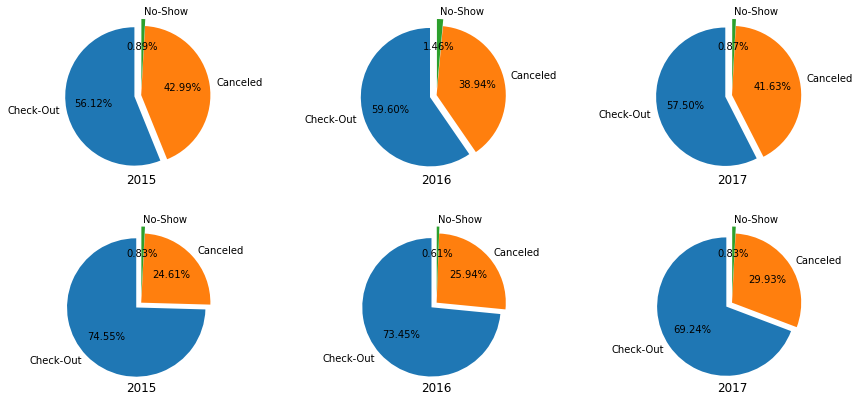

In [94]:
status = ["Check-Out", "Canceled", "No-Show"]
count1 = [7678, 5882, 122]
count2 = [22733, 14852, 555]
count3 = [15817, 11452, 239]
count4 = [6176, 2039, 69]
count5 = [13637, 4817, 113]
count6 = [9125, 3945, 109]

plt.figure(figsize = (15, 7))
plt.subplot(2, 3, 1)  
plt.pie(count1, labels = status, explode = (0.1, 0, 0.1), autopct = "%.2f%%", startangle = 90)
plt.title("2015", y = -0.05)

plt.subplot(2, 3, 2)  
plt.pie(count2, labels = status, explode = (0.1, 0, 0.1), autopct = "%.2f%%", startangle = 90)
plt.title("2016", y = -0.05)

plt.subplot(2, 3, 3)  
plt.pie(count3, labels = status, explode = (0.1, 0, 0.1), autopct = "%.2f%%", startangle = 90)
plt.title("2017", y = -0.05)
plt.subplot(2, 3, 4)  
plt.pie(count4, labels = status, explode = (0.1, 0, 0.1), autopct = "%.2f%%", startangle = 90)
plt.title("2015", y = -0.05)

plt.subplot(2, 3, 5)  
plt.pie(count5, labels = status, explode = (0.1, 0, 0.1), autopct = "%.2f%%", startangle = 90)
plt.title("2016", y = -0.05)

plt.subplot(2, 3, 6)  
plt.pie(count6, labels = status, explode = (0.1, 0, 0.1), autopct = "%.2f%%", startangle = 90)
plt.title("2017", y = -0.05)

plt.show();

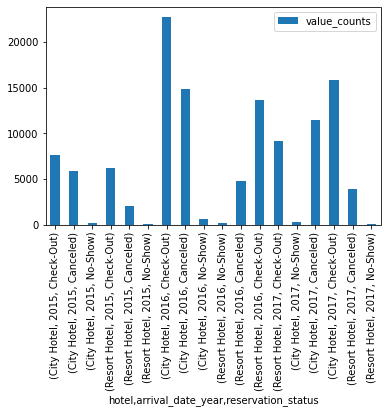

In [95]:
df.groupby(["hotel", "arrival_date_year"])["reservation_status"].agg(["value_counts"]).sort_values(by = "arrival_date_year", ascending = True).plot(kind = "bar");

Reservation Status

In [96]:
print (df.reservation_status.unique())

['Check-Out' 'Canceled' 'No-Show']


In [97]:
df.iloc[np.where((df["reservation_status"] == "Check-Out") & (df["arrival_date_year"] == 2015))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2015, 'Check-Out', '2015-12-08')

In [98]:
df.iloc[np.where((df["reservation_status"] == "Check-Out") & (df["arrival_date_year"] == 2016))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2016, 'Check-Out', '2016-06-26')

In [99]:
df.iloc[np.where((df["reservation_status"] == "Check-Out") & (df["arrival_date_year"] == 2017))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2017, 'Check-Out', '2017-01-19')

Most cancelled dates in 2015, 2016, 2017

In [100]:
df.iloc[np.where((df["reservation_status"] == "Canceled") & (df["arrival_date_year"] == 2015))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2015, 'Canceled', '2015-07-06')

In [101]:
df.iloc[np.where((df["reservation_status"] == "Canceled") & (df["arrival_date_year"] == 2016))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2016, 'Canceled', '2015-10-21')

In [102]:
df.iloc[np.where((df["reservation_status"] == "Canceled") & (df["arrival_date_year"] == 2017))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2017, 'Canceled', '2016-11-25')

Most No-Show dates in 2015, 2016, 2017

In [103]:
df.iloc[np.where((df["reservation_status"] == "No-Show") & (df["arrival_date_year"] == 2016))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2016, 'No-Show', '2016-02-28')

In [104]:
df.iloc[np.where((df["reservation_status"] == "No-Show") & (df["arrival_date_year"] == 2016))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2016, 'No-Show', '2016-02-28')

In [105]:
df.iloc[np.where((df["reservation_status"] == "No-Show") & (df["arrival_date_year"] == 2017))][["arrival_date_year", "reservation_status", "reservation_status_date"]].value_counts().idxmax()

(2017, 'No-Show', '2017-02-25')